In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/mujahid2580/Machine-Learning-Problems-DataSets/master/Classification/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [42]:
x = df.drop(["species","sepal_length"],axis=1)
y = df['species']

In [23]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier()

In [46]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
yhat = dtc.predict(x_test)

In [48]:
importance = dtc.feature_importances_
importance

array([0.01347774, 0.05883923, 0.92768303])

feature: 0 , score: 0.01348
feature: 1 , score: 0.05884
feature: 2 , score: 0.92768


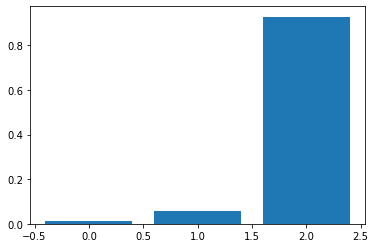

In [49]:
for i,v in enumerate(importance):
    print("feature: %0d , score: %.5f" % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [51]:
cm = confusion_matrix(y_test,yhat)
cm

array([[17,  0,  0],
       [ 0,  6,  1],
       [ 0,  1, 13]], dtype=int64)

In [52]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.86      0.86      0.86         7
   virginica       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38



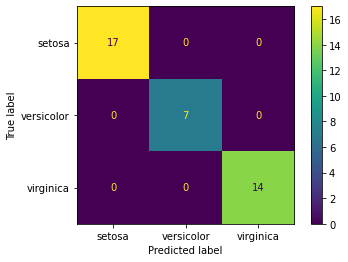

In [53]:
plot_confusion_matrix(dtc,x_test,yhat)

In [54]:
from sklearn import tree

[Text(167.40000000000003, 199.32, 'X[2] <= 0.8\ngini = 0.662\nsamples = 112\nvalue = [33, 43, 36]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[2] <= 1.75\ngini = 0.496\nsamples = 79\nvalue = [0, 43, 36]'),
 Text(167.40000000000003, 126.83999999999999, 'X[1] <= 5.05\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(66.96000000000001, 90.6, 'X[2] <= 1.65\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(33.480000000000004, 54.359999999999985, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(100.44000000000001, 54.359999999999985, 'X[0] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(66.96000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 90.6, 'X[1] <= 5.35\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Te

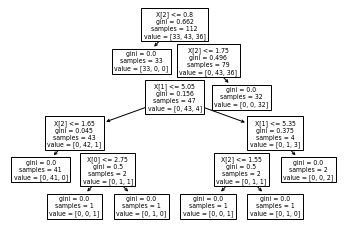

In [55]:
tree.plot_tree(dtc)

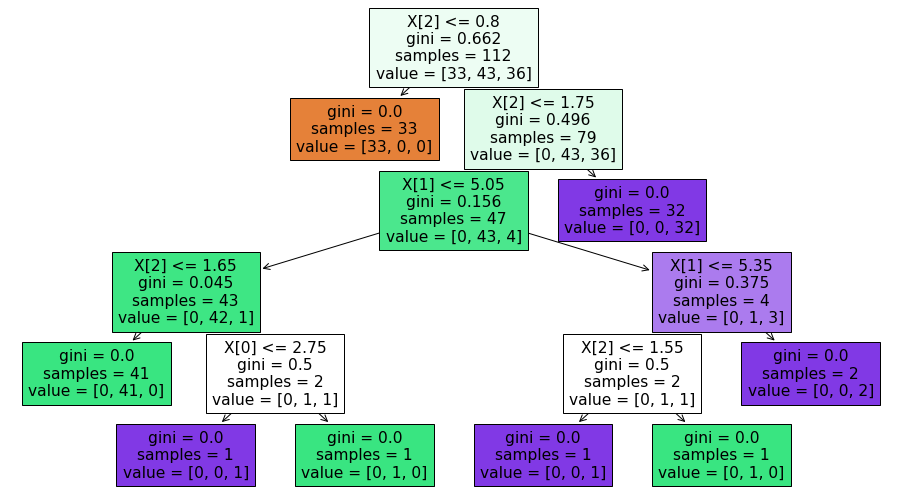

In [56]:
plt.figure(figsize=(16,9))
tree.plot_tree(dtc,filled=True)
plt.show()